In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
#Loading Dataset
data = pd.read_csv('Insurance_Data.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [3]:
#Rows and Columns
data.shape

(4968, 7)

In [4]:
#Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4968 entries, 0 to 4967
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4968 non-null   float64
 1   sex       4968 non-null   object 
 2   bmi       4968 non-null   float64
 3   children  4968 non-null   int64  
 4   smoker    4968 non-null   object 
 5   region    4968 non-null   object 
 6   charges   4968 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 271.8+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,4968.000000,4968.000000,4968.000000,4968.000000
mean,38.973217,30.638741,2.124195,12915.595887
std,12.689780,5.625163,1.710139,11130.773178
min,18.000000,15.960000,0.000000,1121.873900
25%,28.000000,26.600000,1.000000,5438.749100
50%,39.053779,30.210000,2.000000,9432.925300
75%,49.000000,34.210000,4.000000,15057.395497
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
import seaborn as sns

C:\Users\Rishijamili\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


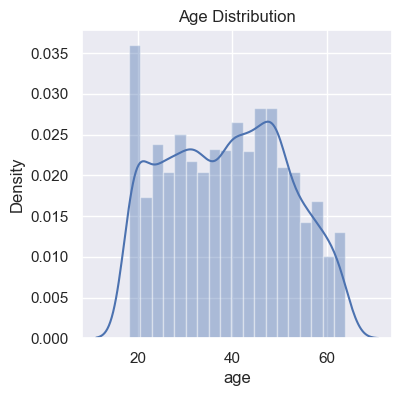

In [8]:
#Distribution of Age value
sns.set()
plt.figure(figsize = (4,4))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

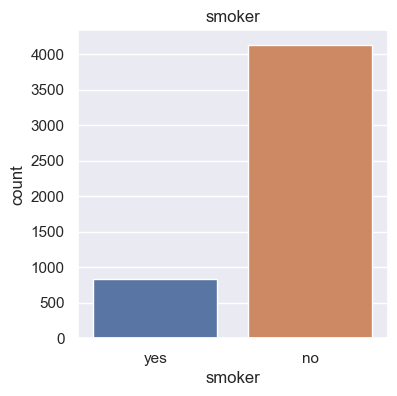

In [9]:
#Smoker column
plt.figure(figsize = (4,4))
sns.countplot(x = 'smoker', data = data)
plt.title('smoker')
plt.show()

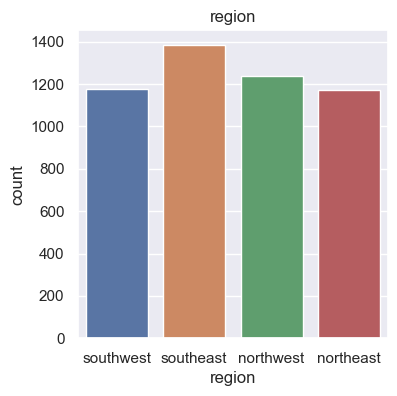

In [10]:
#Region column
plt.figure(figsize = (4,4))
sns.countplot(x = 'region', data = data)
plt.title('region')
plt.show()

C:\Users\Rishijamili\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


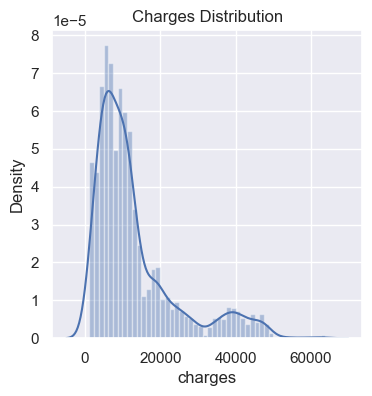

In [11]:
#Distribution of charges value
plt.figure(figsize = (4,4))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

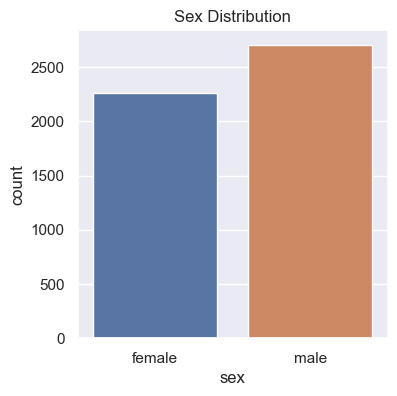

In [12]:
#Gender column
plt.figure(figsize = (4,4))
sns.countplot(x = 'sex', data = data)
plt.title('Sex Distribution')
plt.show()

C:\Users\Rishijamili\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


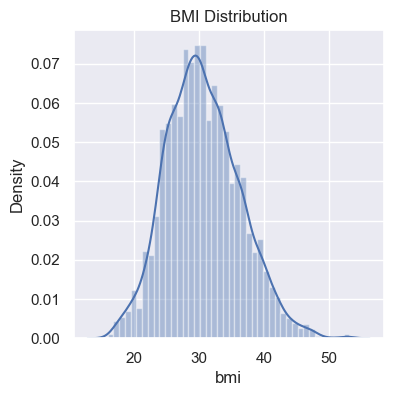

In [13]:
#Bmi Distribution
plt.figure(figsize = (4,4))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

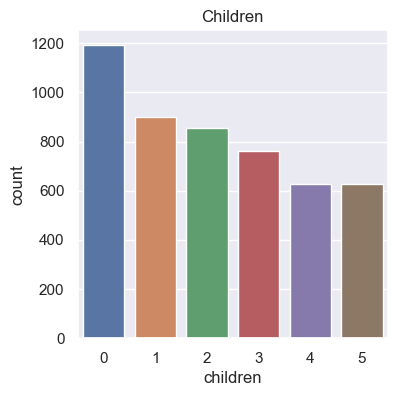

In [14]:
#Children column
plt.figure(figsize = (4,4))
sns.countplot(x = 'children', data = data)
plt.title('Children')
plt.show()

C:\Users\Rishijamili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


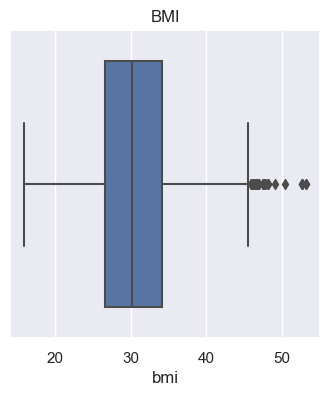

In [15]:
plt.figure(figsize = (4,4))
sns.boxplot(data['bmi'])
plt.title('BMI')
plt.show()

In [16]:
#We have 3 categorical values i.e., Sex, Smoker, Region
#We have to change them to Numerical values
data.replace({'sex':{'male':0,'female':1}},inplace=True)#Sex
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)#Smoker
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)#Region

In [17]:
X = data.drop(['charges'],axis = 1)
Y = data['charges']
Y = Y.values.reshape(-1, 1)

In [18]:
#Splitting the Dataset
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size = 0.2,random_state = 2)

In [19]:
#Fitting the model
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [20]:
svr = SVR()
svr.fit(X_train,Y_train)

C:\Users\Rishijamili\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [21]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train,Y_train)

C:\Users\Rishijamili\AppData\Local\Temp\ipykernel_13888\3298205042.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,Y_train)


RandomForestRegressor(random_state=42)

In [22]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

C:\Users\Rishijamili\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [23]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
#Predicting the model
Y_pred_lr = lr.predict(X_test)
Y_pred_svr = svr.predict(X_test)
Y_pred_rfr = rfr.predict(X_test)
Y_pred_gbr = gbr.predict(X_test)
Y_pred_xgb = xgb.predict(X_test)

In [25]:
#R-Squared value
R_Squared_lr = metrics.r2_score(Y_test,Y_pred_lr)
R_Squared_svr = metrics.r2_score(Y_test,Y_pred_svr)
R_Squared_rfr = metrics.r2_score(Y_test,Y_pred_rfr)
R_Squared_gbr = metrics.r2_score(Y_test,Y_pred_gbr)
R_Squared_xgb = metrics.r2_score(Y_test,Y_pred_xgb)
print("R2 Score for Linear Regression: ",R_Squared_lr)
print("R2 Score for Support Vector Regressor: ",R_Squared_svr)
print("R2 Score for Random Forest Regressor: ",R_Squared_rfr)
print("R2 Score for Gradient Boosting Regressor: ",R_Squared_gbr)
print("R2 Score for XGBoost Regressor: ",R_Squared_xgb)

R2 Score for Linear Regression:  0.7405447167195387
R2 Score for Support Vector Regressor:  -0.08034088507733483
R2 Score for Random Forest Regressor:  0.944861274115058
R2 Score for Gradient Boosting Regressor:  0.8849898603861692
R2 Score for XGBoost Regressor:  0.941382210517739


In [26]:
#Mean Square Error
MSE_lr = metrics.mean_squared_error(Y_test,Y_pred_lr)
MSE_svr = metrics.mean_squared_error(Y_test,Y_pred_svr)
MSE_rfr = metrics.mean_squared_error(Y_test,Y_pred_rfr)
MSE_gbr = metrics.mean_squared_error(Y_test,Y_pred_gbr)
MSE_xgb = metrics.mean_squared_error(Y_test,Y_pred_xgb)
print("MSE for Linear Regression: ",MSE_lr)
print("MSE for Support Vector Regressor: ",MSE_svr)
print("MSE for Random Forest Regressor: ",MSE_rfr)
print("MSE for Gradient Boosting Regressor: ",MSE_gbr)
print("MSE for XGBoost Regressor: ",MSE_xgb)

MSE for Linear Regression:  32437371.99020757
MSE for Support Vector Regressor:  135065352.00365528
MSE for Random Forest Regressor:  6893501.415666257
MSE for Gradient Boosting Regressor:  14378688.435752044
MSE for XGBoost Regressor:  7328457.60024254


In [27]:
#Root Mean Squared Error
RMSE_lr = metrics.mean_squared_error(Y_test,Y_pred_lr,squared = False)
RMSE_svr = metrics.mean_squared_error(Y_test,Y_pred_svr,squared = False)
RMSE_rfr = metrics.mean_squared_error(Y_test,Y_pred_rfr,squared = False)
RMSE_gbr = metrics.mean_squared_error(Y_test,Y_pred_gbr,squared = False)
RMSE_xgb = metrics.mean_squared_error(Y_test,Y_pred_xgb,squared = False)
print("RMSE for Linear Regression: ",RMSE_lr)
print("RMSE for Support Vector Regressor: ",RMSE_svr)
print("RMSE for Random Forest Regressor: ",RMSE_rfr)
print("RMSE for Gradient Boosting Regressor: ",RMSE_gbr)
print("RMSE for XGBoost Regressor: ",RMSE_xgb)

RMSE for Linear Regression:  5695.38163692369
RMSE for Support Vector Regressor:  11621.762000817918
RMSE for Random Forest Regressor:  2625.547831532737
RMSE for Gradient Boosting Regressor:  3791.9241073302146
RMSE for XGBoost Regressor:  2707.112409975349


In [28]:
#Mean Absolute Error
MAE_lr = metrics.mean_absolute_error(Y_test,Y_pred_lr)
MAE_svr = metrics.mean_absolute_error(Y_test,Y_pred_svr)
MAE_rfr = metrics.mean_absolute_error(Y_test,Y_pred_rfr)
MAE_gbr = metrics.mean_absolute_error(Y_test,Y_pred_gbr)
MAE_xgb = metrics.mean_absolute_error(Y_test,Y_pred_xgb)
print("MAE for Linear Regression: ",MAE_lr)
print("MAE for Support Vector Regressor: ",MAE_svr)
print("MAE for Random Forest Regressor: ",MAE_rfr)
print("MAE for Gradient Boosting Regressor: ",MAE_gbr)
print("MAE for XGBoost Regressor: ",MAE_xgb)

MAE for Linear Regression:  3889.426196669095
MAE for Support Vector Regressor:  7076.891537357101
MAE for Random Forest Regressor:  1078.6544629341404
MAE for Gradient Boosting Regressor:  2123.209524203483
MAE for XGBoost Regressor:  1247.7021293025182


In [29]:
#Mean Absolute Error
MAPE_lr = metrics.mean_absolute_percentage_error(Y_test,Y_pred_lr)
MAPE_svr = metrics.mean_absolute_percentage_error(Y_test,Y_pred_svr)
MAPE_rfr = metrics.mean_absolute_percentage_error(Y_test,Y_pred_rfr)
MAPE_gbr = metrics.mean_absolute_percentage_error(Y_test,Y_pred_gbr)
MAPE_xgb = metrics.mean_absolute_percentage_error(Y_test,Y_pred_xgb)
print("MAPE for Linear Regression: ",MAPE_lr)
print("MAPE for Support Vector Regressor: ",MAPE_svr)
print("MAPE for Random Forest Regressor: ",MAPE_rfr)
print("MAPE for Gradient Boosting Regressor: ",MAPE_gbr)
print("MAPE for XGBoost Regressor: ",MAPE_xgb)

MAPE for Linear Regression:  0.3721646492483949
MAPE for Support Vector Regressor:  0.7292685535040226
MAPE for Random Forest Regressor:  0.10491453661830627
MAPE for Gradient Boosting Regressor:  0.22417257166515284
MAPE for XGBoost Regressor:  0.13034586247017227


In [30]:
#Taking input
inp = np.array([[33],[0],[22.705],[0],[1],[3]])
inp = inp.reshape(1,-1)
#Printing the Outcome
out = rfr.predict(inp)
print(out)
print("The Insurance cost in USD : ",out[0])

[14461.79008505]
The Insurance cost in USD :  14461.790085049986


C:\Users\Rishijamili\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
